---------------------------------------
Affichage données initiales            xclara.arff


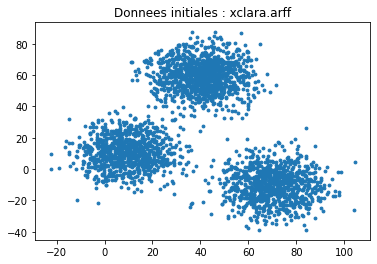

------------------------------------------------------
Appel KMeans pour une valeur de k fixée


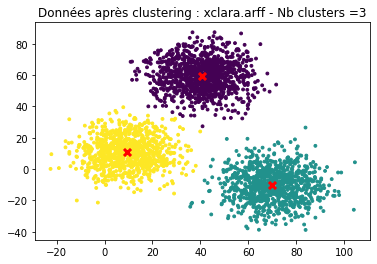

nb clusters = 3 , nb iter = 3 , inertie =  611605.8806933891 , runtime =  7.34 ms
[[ 0.         75.71005186 58.11810068]
 [75.71005186  0.         63.92661838]
 [58.11810068 63.92661838  0.        ]]


In [1]:
 """
Created on 2023/09/11

@author: huguet
"""
import os
os.environ["OMP_NUM_THREADS"] = '4'

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics

##################################################################
# Exemple :  k-Means Clustering

path = './artificial/'
name="xclara.arff"

#path_out = './fig/'
databrut = arff.loadarff(open(path+str(name), 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])

# PLOT datanp (en 2D) - / scatter plot
# Extraire chaque valeur de features pour en faire une liste
# EX : 
# - pour t1=t[:,0] --> [1, 3, 5, 7]
# - pour t2=t[:,1] --> [2, 4, 6, 8]
print("---------------------------------------")
print("Affichage données initiales            "+ str(name))
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

# Run clustering method for a given number of clusters
print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k fixée")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
# informations sur le clustering obtenu
iteration = model.n_iter_
inertie = model.inertia_
centroids = model.cluster_centers_

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, c=labels, s=8)
plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels)

from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(centroids)
print(dists)

------------------------------------------------------
Appel KMeans pour une valeur de k =3


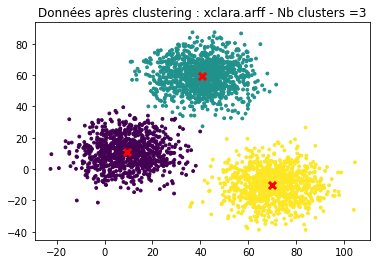

nb clusters = 3 , nb iter = 2 , inertie =  611605.8806933891 , runtime =  28.17 ms
[[ 0.         58.11810068 63.92661838]
 [58.11810068  0.         75.71005186]
 [63.92661838 75.71005186  0.        ]]


In [29]:
# Run clustering method for a given number of clusters
print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k =3")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
# informations sur le clustering obtenu
iteration = model.n_iter_
inertie = model.inertia_
centroids = model.cluster_centers_

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, c=labels, s=8)
plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels)

from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(centroids)
print(dists)

In [10]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Calcul de la distance minimale entre chaque point de données et son centre de cluster
min_distances = np.min(pairwise_distances(datanp, centroids), axis=1)

# Calcul de la distance maximale entre chaque point de données et son centre de cluster
max_distances = np.max(pairwise_distances(datanp, centroids), axis=1)

# Calcul de la distance moyenne entre chaque point de données et son centre de cluster
mean_distances = np.mean(pairwise_distances(datanp, centroids))

print(min_distances)
print(max_distances)
print(mean_distances)

[15.7742349   9.87655463  9.04449993 ...  5.47219431 20.90805072
 15.5959933 ]
[73.8545108  58.08388842 71.01508094 ... 74.13522418 87.65757848
 87.98558269]
48.797534450517794


In [15]:
# Calcul de la distance minimale entre les différents centres de clusters
min_separation = np.min(pairwise_distances(centroids, centroids))

# Calcul de la distance maximale entre les différents centres de clusters
max_separation = np.max(pairwise_distances(centroids, centroids))

# Calcul de la distance moyenne entre les différents centres de clusters
mean_separation = np.mean(pairwise_distances(centroids, centroids))

print(min_separation)
print(max_separation)
print(mean_separation)

0.0
75.71005185791087
43.94550465017213


------------------------------------------------------
Appel KMeans pour une valeur de k  2


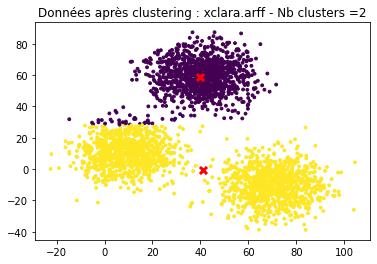

nb clusters = 2 , nb iter = 6 , inertie =  [2491128.6220429493] , runtime =  15.38 ms
[[ 0.         59.51399049]
 [59.51399049  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  3


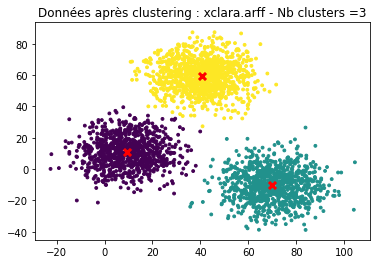

nb clusters = 3 , nb iter = 2 , inertie =  [2491128.6220429493, 611605.880693389] , runtime =  14.05 ms
[[ 0.         63.92661838 58.11810068]
 [63.92661838  0.         75.71005186]
 [58.11810068 75.71005186  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  4


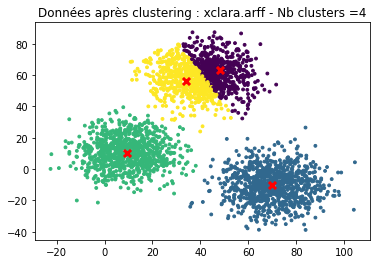

nb clusters = 4 , nb iter = 8 , inertie =  [2491128.6220429493, 611605.880693389, 538086.7618398082] , runtime =  34.97 ms
[[ 0.         76.66400282 65.46753075 16.05627484]
 [76.66400282  0.         64.00041152 75.44818586]
 [65.46753075 64.00041152  0.         51.65027016]
 [16.05627484 75.44818586 51.65027016  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  5


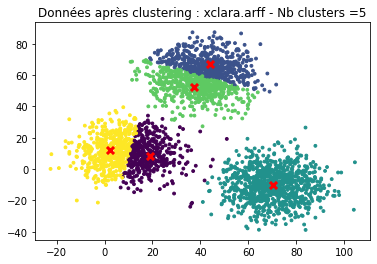

nb clusters = 5 , nb iter = 12 , inertie =  [2491128.6220429493, 611605.880693389, 538086.7618398082, 481888.6808224021] , runtime =  48.69 ms
[[ 0.         63.36162983 54.59676428 47.68675568 16.78252419]
 [63.36162983  0.         81.30411794 15.67852234 68.77077825]
 [54.59676428 81.30411794  0.         70.68920179 71.23620948]
 [47.68675568 15.67852234 70.68920179  0.         53.59072955]
 [16.78252419 68.77077825 71.23620948 53.59072955  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  6


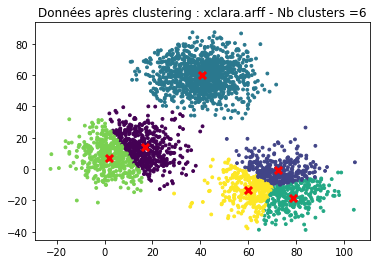

nb clusters = 6 , nb iter = 10 , inertie =  [2491128.6220429493, 611605.880693389, 538086.7618398082, 481888.6808224021, 438277.4908796248] , runtime =  18.54 ms
[[ 0.         57.37381558 51.46372588 69.65935513 16.75612529 50.88722503]
 [57.37381558  0.         68.10696922 18.78219855 71.12400144 18.22303407]
 [51.46372588 68.10696922  0.         86.72986621 65.50207051 75.70236441]
 [69.65935513 18.78219855 86.72986621  0.         81.00118673 19.5425235 ]
 [16.75612529 71.12400144 65.50207051 81.00118673  0.         61.53154762]
 [50.88722503 18.22303407 75.70236441 19.5425235  61.53154762  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  7


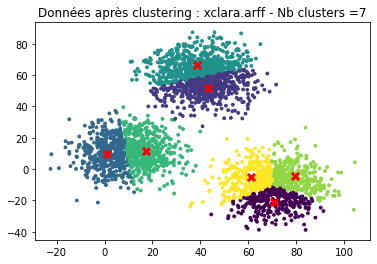

nb clusters = 7 , nb iter = 9 , inertie =  [2491128.6220429493, 611605.880693389, 538086.7618398082, 481888.6808224021, 438277.4908796248, 370433.3879415991] , runtime =  87.51 ms
[[ 0.         77.56252877 75.98764423 93.28255075 62.48377961 18.77966948
  18.51428792]
 [77.56252877  0.         59.31339452 15.75849142 47.41163509 66.78349785
  59.47613384]
 [75.98764423 59.31339452  0.         68.25488434 16.41246078 79.69171906
  61.66189177]
 [93.28255075 15.75849142 68.25488434  0.         58.91940525 82.00517506
  75.23252082]
 [62.48377961 47.41163509 16.41246078 58.91940525  0.         64.21355439
  46.72699795]
 [18.77966948 66.78349785 79.69171906 82.00517506 64.21355439  0.
  18.60673991]
 [18.51428792 59.47613384 61.66189177 75.23252082 46.72699795 18.60673991
   0.        ]]


In [34]:
k_valeurs = range(2, 8)
inertie = []

for k in k_valeurs : 
    print("------------------------------------------------------")
    print("Appel KMeans pour une valeur de k ", k)
    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    # informations sur le clustering obtenu
    iteration = model.n_iter_
    inertie.append(model.inertia_)
    centroids = model.cluster_centers_
    #plt.figure(figsize=(6, 6))
    plt.scatter(f0, f1, c=labels, s=8)
    plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
    plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
    #plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
    plt.show()

    print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    #print("labels", labels)

    from sklearn.metrics.pairwise import euclidean_distances
    dists = euclidean_distances(centroids)
    print(dists)

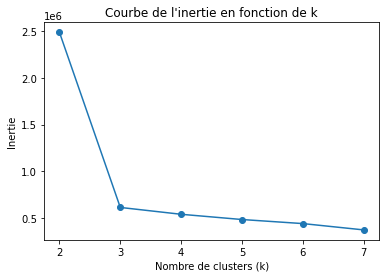

In [35]:
plt.plot(k_valeurs, inertie, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Courbe de l'inertie en fonction de k")
plt.show()

###### Remarque
Inertie : L'inertie est une mesure couramment utilisée pour évaluer la qualité d'une solution de clustering. Elle mesure la dispersion des points de données à l'intérieur de chaque cluster. On observe la bonne solution au niveau de la cassure de la courbe d'inertie en fonction de k. 

Score de regroupement et de séparation : voir partie 2.1